In [ ]:
# %pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


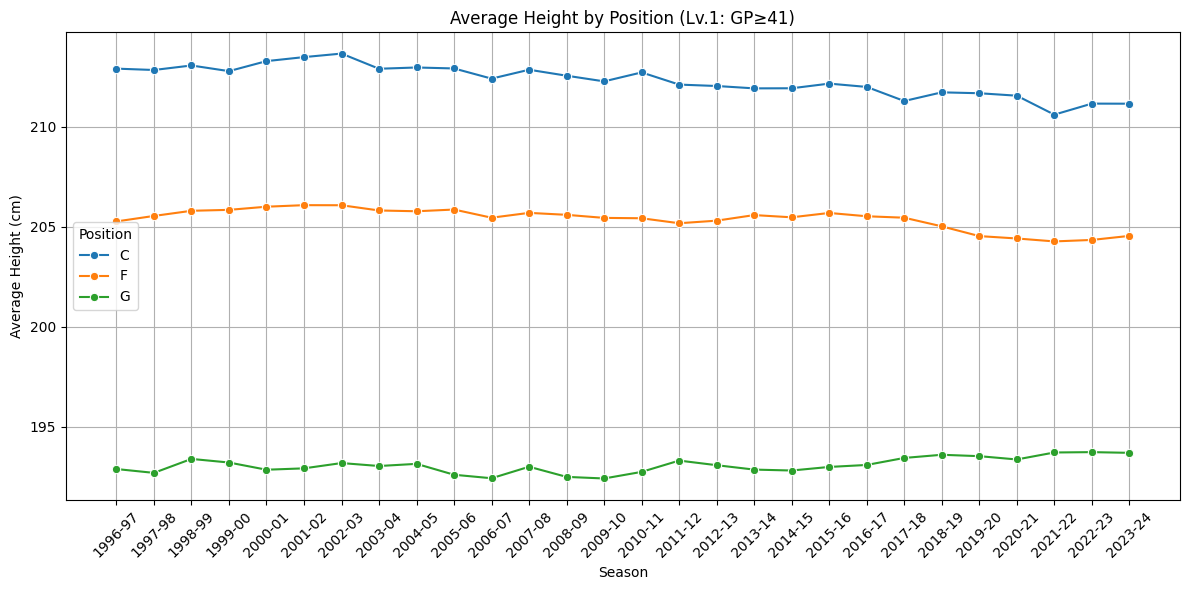

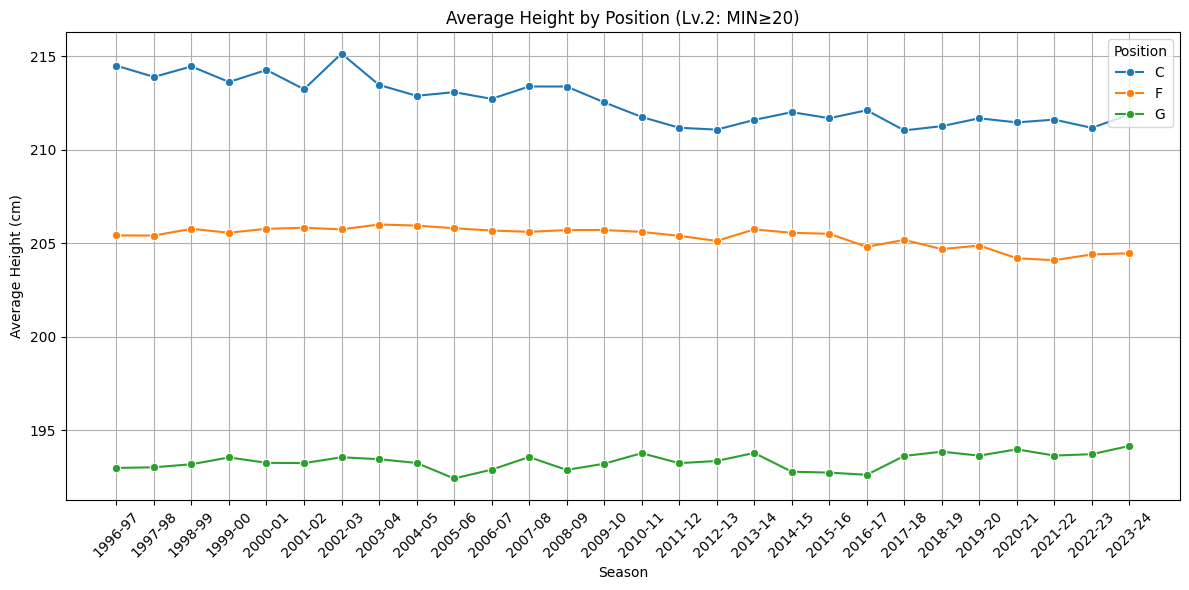

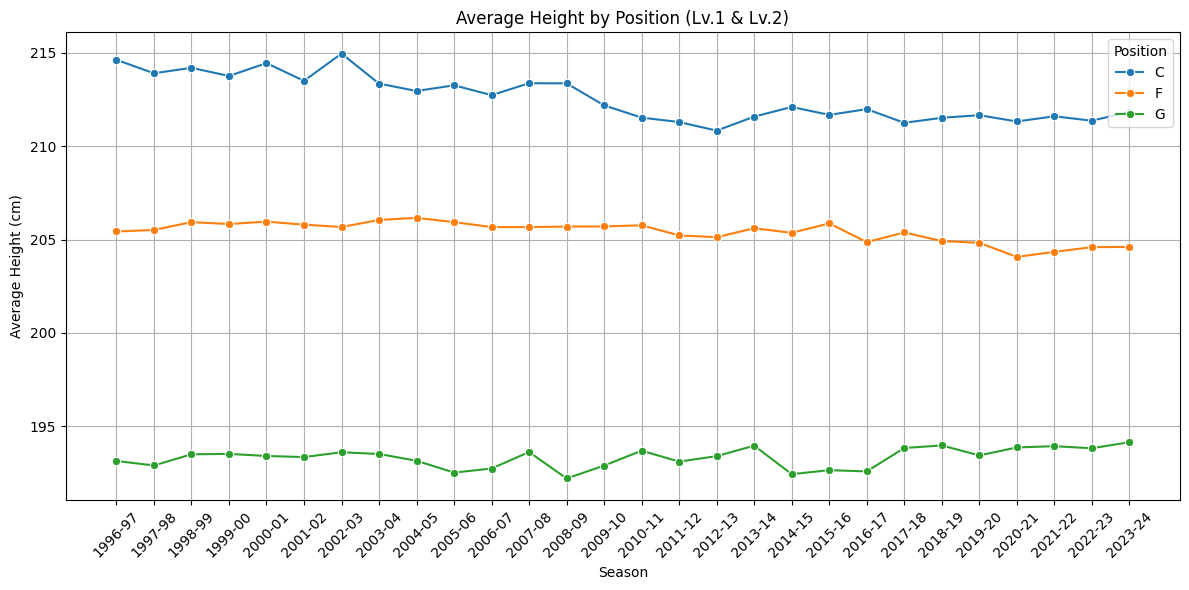

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: データ読み込み ---
df = pd.read_pickle("df_valid_gfc.pkl")  # または pd.read_csv("df_valid_gfc.csv")

# --- Step 2: 平均身長の年次・ポジション別集計関数 ---
def compute_avg_heights(df, filter_column):
    filtered = df[df[filter_column]]
    grouped = (
        filtered
        .groupby(['SEASON', 'POSITION_GFC'])['HEIGHT_CM']
        .mean()
        .reset_index()
    )
    return grouped

# --- Step 3: 可視化関数 ---
def plot_position_trends(grouped_df, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_df, x='SEASON', y='HEIGHT_CM', hue='POSITION_GFC', marker='o')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel("Average Height (cm)")
    plt.xlabel("Season")
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title="Position")
    plt.show()

# --- Step 4: Lv1, Lv2, Lv1_and_Lv2 各フィルターで分析・表示 ---
for level, label in zip(['Lv1', 'Lv2', 'Lv1_and_Lv2'],
                        ['Lv.1: GP≥41', 'Lv.2: MIN≥20', 'Lv.1 & Lv.2']):
    avg_heights = compute_avg_heights(df, level)
    plot_position_trends(avg_heights, f"Average Height by Position ({label})")

In [4]:
# ① 差分（初期年との差分）を折れ線で表示
def plot_position_deltas(df_avg, title):
    # 基準年（最初のシーズン）の身長データ
    base_year = df_avg['SEASON'].min()
    base = df_avg[df_avg['SEASON'] == base_year][['POSITION_GFC', 'HEIGHT_CM']].set_index('POSITION_GFC')
    
    # 各年との差分（cm）
    df_delta = df_avg.copy()
    df_delta['DELTA_CM'] = df_delta.apply(
        lambda row: row['HEIGHT_CM'] - base.loc[row['POSITION_GFC'], 'HEIGHT_CM'], axis=1
    )
    
    # プロット
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_delta, x='SEASON', y='DELTA_CM', hue='POSITION_GFC', marker='o')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(rotation=45)
    plt.title(title + "\n(Height Change from " + base_year + ")")
    plt.ylabel("Change in Height (cm)")
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title="Position")
    plt.show()


In [6]:
# ② トレンドライン（回帰直線）を描く
def plot_with_regression(df_avg, title):
    # シーズンを年に変換（例："1996-97" → 1996）
    df_reg = df_avg.copy()
    df_reg['SEASON_NUM'] = df_reg['SEASON'].apply(lambda s: int(s.split('-')[0]))

    plt.figure(figsize=(12, 6))
    sns.lmplot(
        data=df_reg,
        x='SEASON_NUM',
        y='HEIGHT_CM',
        hue='POSITION_GFC',
        height=6,
        aspect=2,
        ci=None,
        markers='o',
        line_kws={'linestyle': '--'}
    )
    plt.title(title + "\n(Linear Regression Trend)")
    plt.xlabel("Season Start Year")
    plt.ylabel("Average Height (cm)")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [7]:
# ③ 5年移動平均（スムージング）
def plot_smoothed(df_avg, title):
    # 各ポジションごとに5年移動平均を算出
    df_avg_sorted = df_avg.sort_values(by='SEASON')
    df_avg_sorted['HEIGHT_SMOOTH'] = (
        df_avg_sorted
        .groupby('POSITION_GFC')['HEIGHT_CM']
        .transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    )

    # プロット
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_avg_sorted, x='SEASON', y='HEIGHT_SMOOTH', hue='POSITION_GFC', marker='o')
    plt.xticks(rotation=45)
    plt.title(title + "\n(5-Year Moving Average)")
    plt.ylabel("Smoothed Average Height (cm)")
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title="Position")
    plt.show()


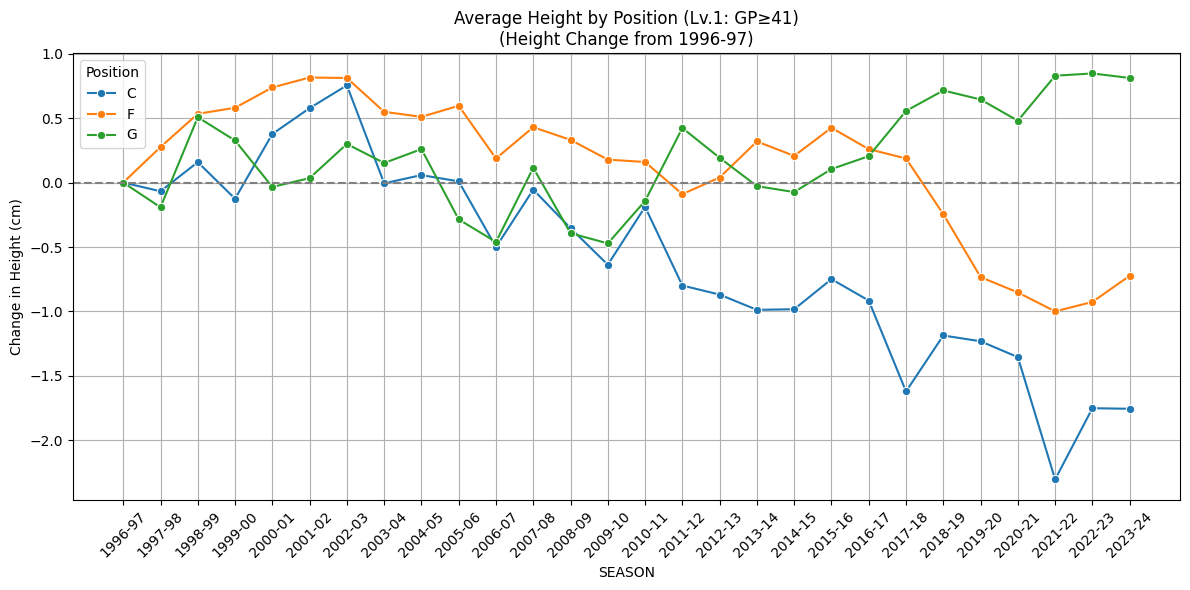

<Figure size 1200x600 with 0 Axes>

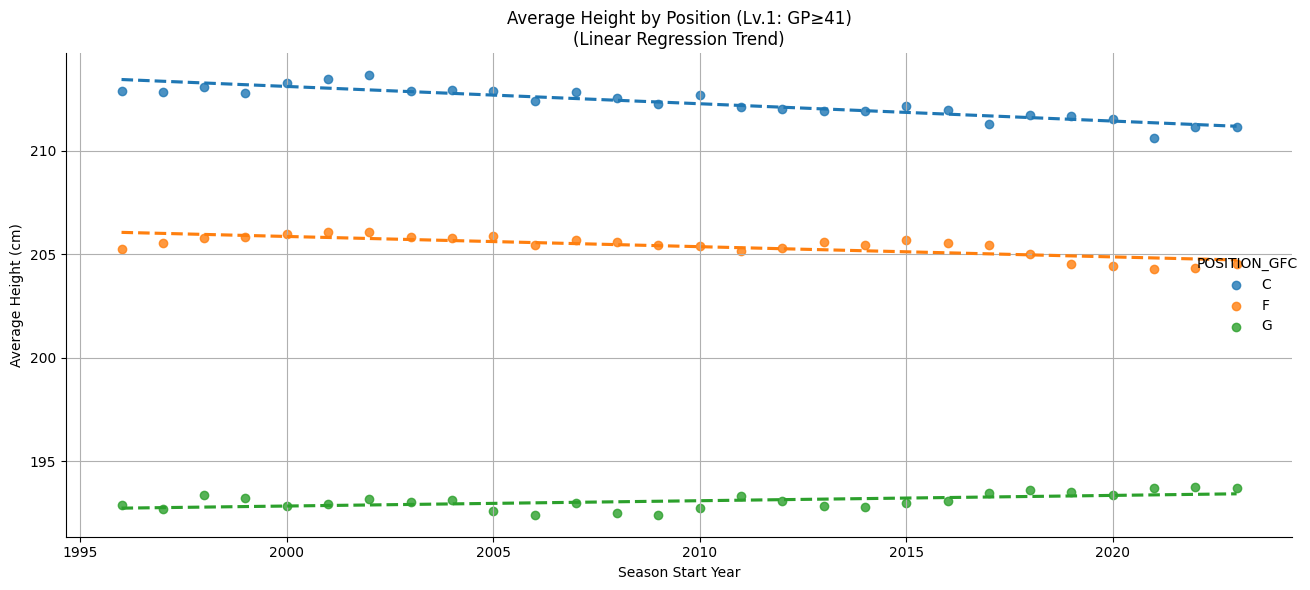

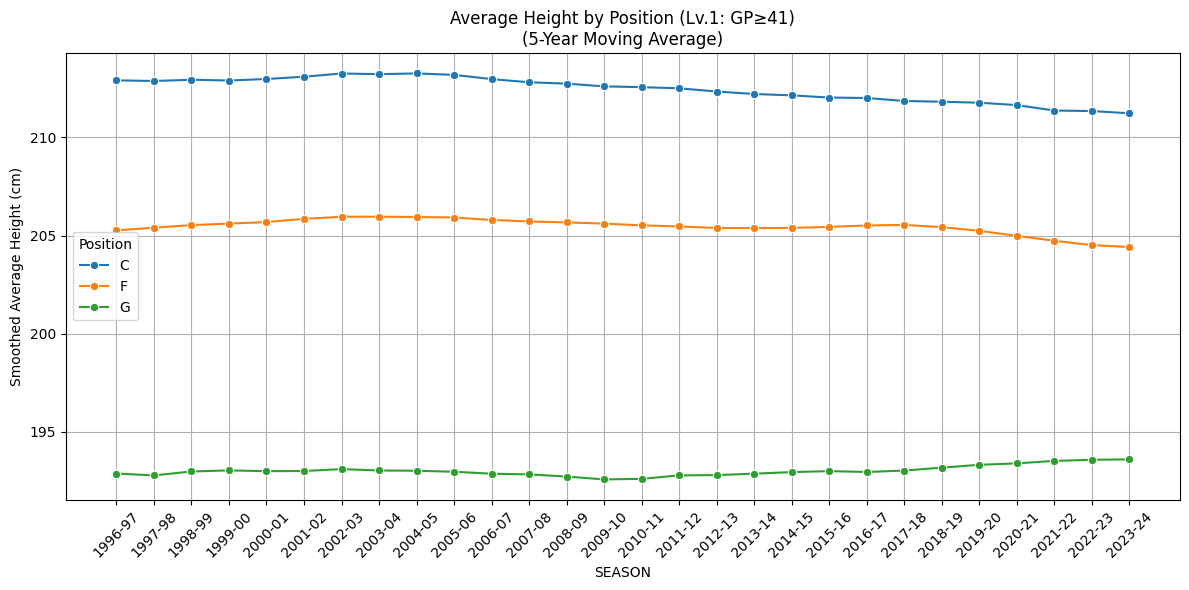

In [8]:
# Lv.1のデータで3つ連続で出す
# 平均身長データを取得
df_lv1 = compute_avg_heights(df, 'Lv1')

# 3つの視点で描画
plot_position_deltas(df_lv1, "Average Height by Position (Lv.1: GP≥41)")
plot_with_regression(df_lv1, "Average Height by Position (Lv.1: GP≥41)")
plot_smoothed(df_lv1, "Average Height by Position (Lv.1: GP≥41)")

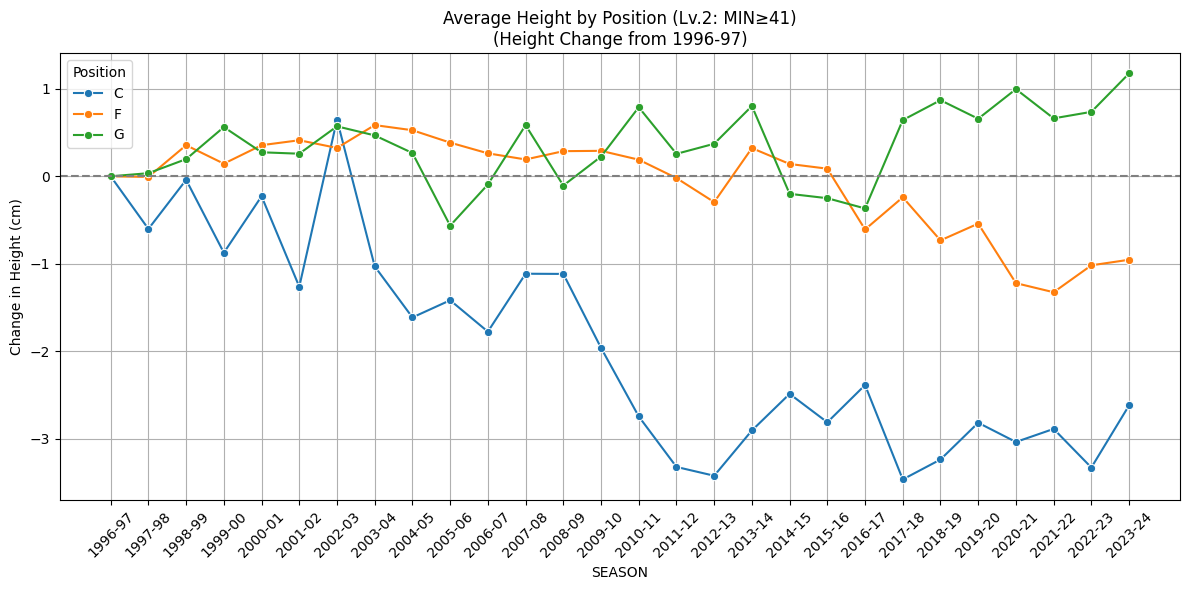

<Figure size 1200x600 with 0 Axes>

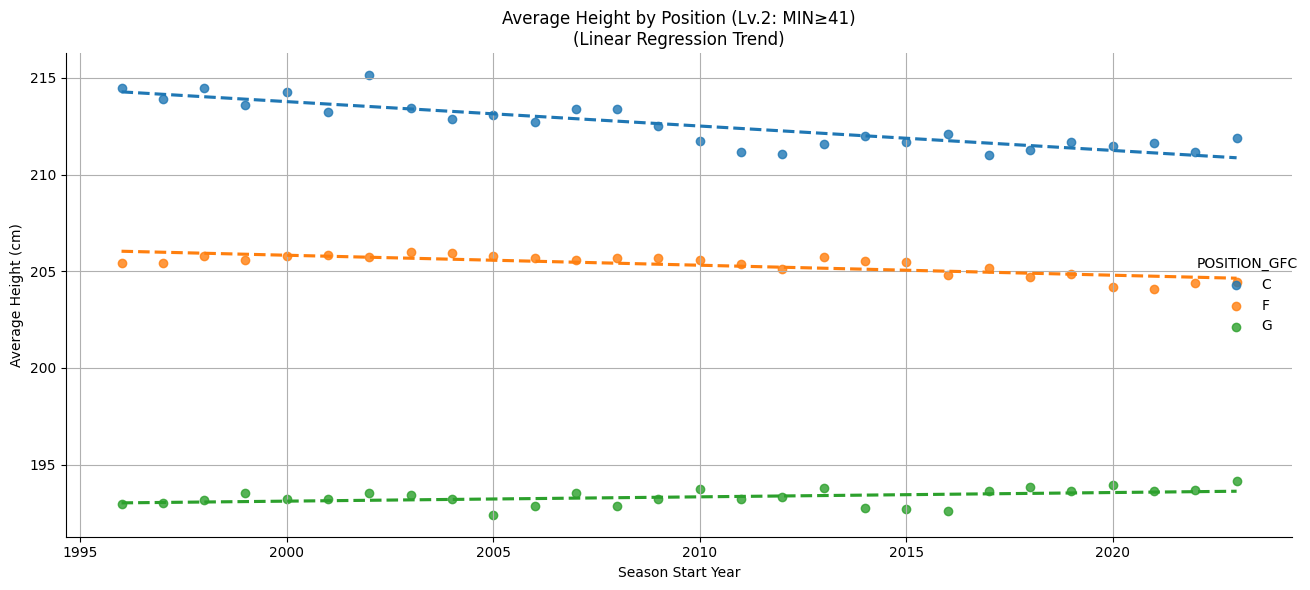

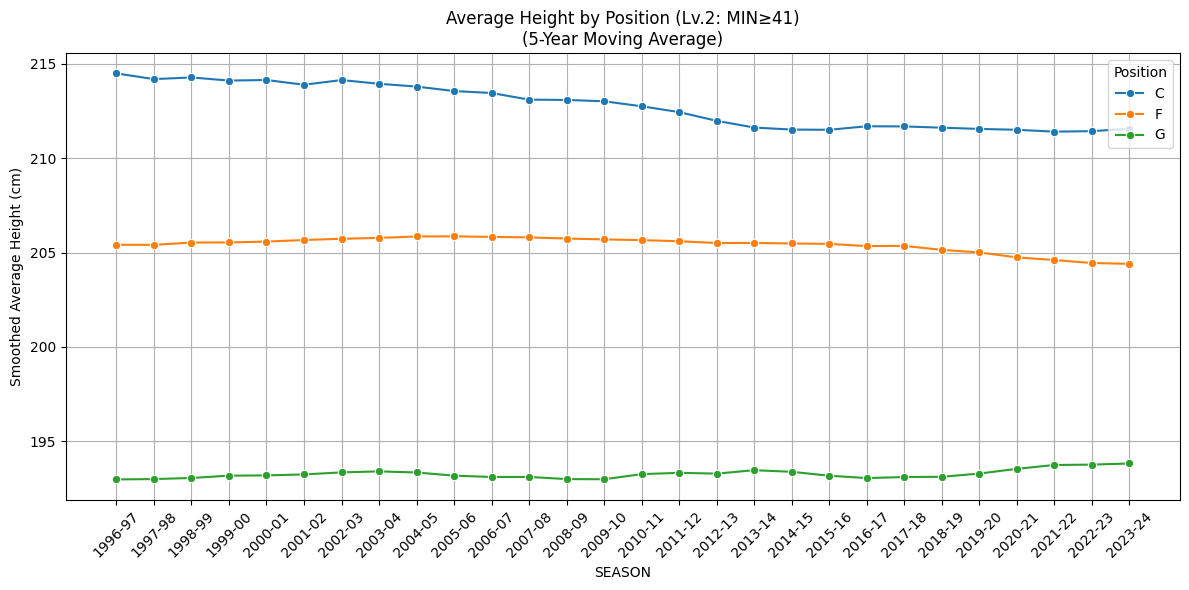

In [9]:
# Lv.2のデータで3つ連続で出す
# 平均身長データを取得
df_lv2 = compute_avg_heights(df, 'Lv2')

# 3つの視点で描画
plot_position_deltas(df_lv2, "Average Height by Position (Lv.2: MIN≥41)")
plot_with_regression(df_lv2, "Average Height by Position (Lv.2: MIN≥41)")
plot_smoothed(df_lv2, "Average Height by Position (Lv.2: MIN≥41)")

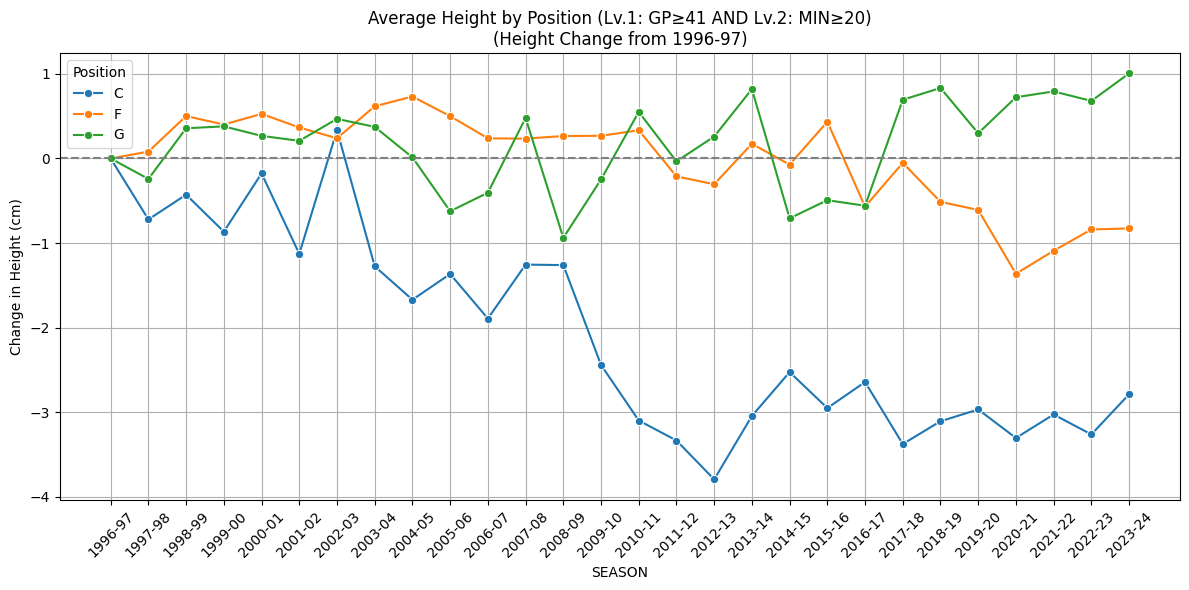

<Figure size 1200x600 with 0 Axes>

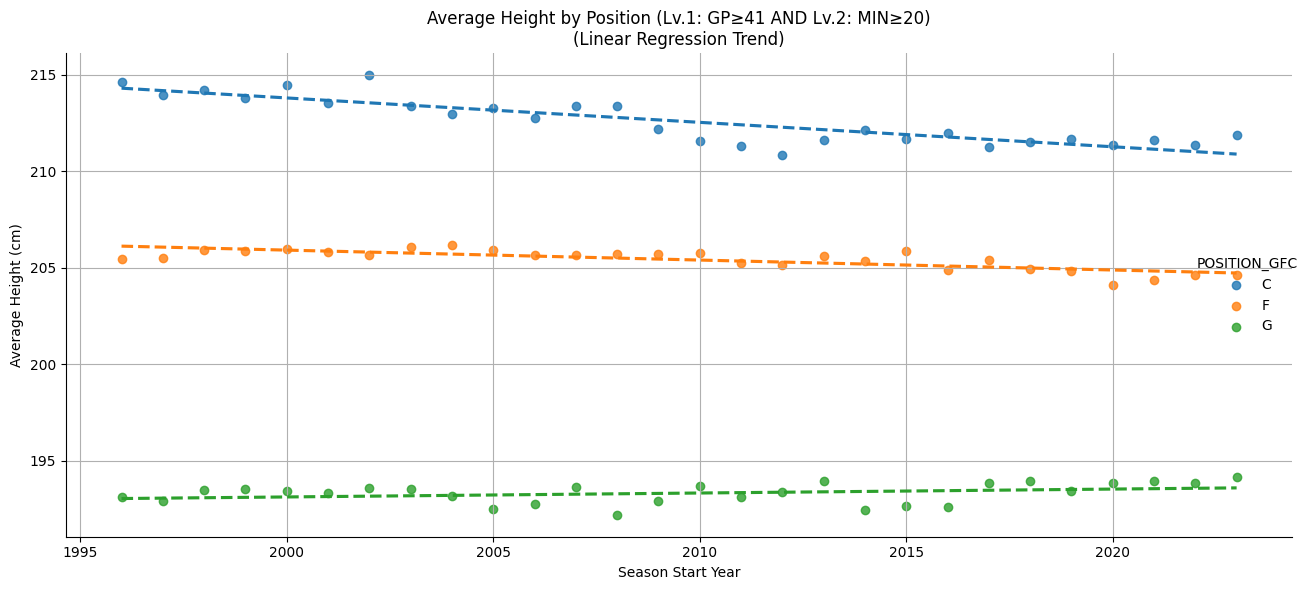

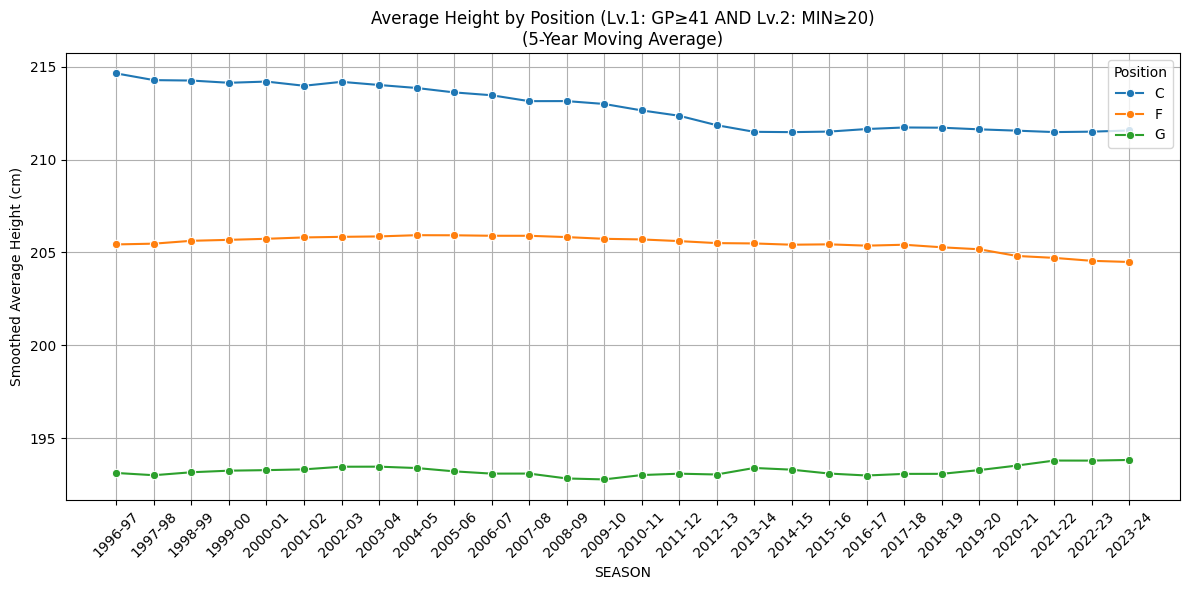

In [10]:
# Lv.1ANDLv.2のデータで3つ連続で出す
# 平均身長データを取得
df_lv1_lv2 = compute_avg_heights(df, 'Lv1_and_Lv2')

# 3つの視点で描画
plot_position_deltas(df_lv1_lv2, "Average Height by Position (Lv.1: GP≥41 AND Lv.2: MIN≥20)")
plot_with_regression(df_lv1_lv2, "Average Height by Position (Lv.1: GP≥41 AND Lv.2: MIN≥20)")
plot_smoothed(df_lv1_lv2, "Average Height by Position (Lv.1: GP≥41 AND Lv.2: MIN≥20)")

平均と比較

In [13]:
# コード：G/F/C + 全体の平均身長を可視化
def compute_with_league_avg(df, filter_column):
    # 対象選手だけにフィルタ
    filtered = df[df[filter_column] & df['POSITION_GFC'].notna()]

    # ポジションごとの平均
    pos_avg = (
        filtered
        .groupby(['SEASON', 'POSITION_GFC'])['HEIGHT_CM']
        .mean()
        .reset_index()
    )

    # リーグ全体平均
    league_avg = (
        filtered
        .groupby('SEASON')['HEIGHT_CM']
        .mean()
        .reset_index()
    )
    league_avg['POSITION_GFC'] = 'League'

    # 合体
    combined = pd.concat([pos_avg, league_avg], ignore_index=True)
    return combined



In [14]:
# 可視化（G/F/C + 全体）
def plot_with_league_avg(df_combined, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_combined,
        x='SEASON',
        y='HEIGHT_CM',
        hue='POSITION_GFC',
        marker='o',
        style='POSITION_GFC'
    )
    plt.xticks(rotation=45)
    plt.title(title + "\n(Including League Average)")
    plt.ylabel("Average Height (cm)")
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Position")
    plt.show()



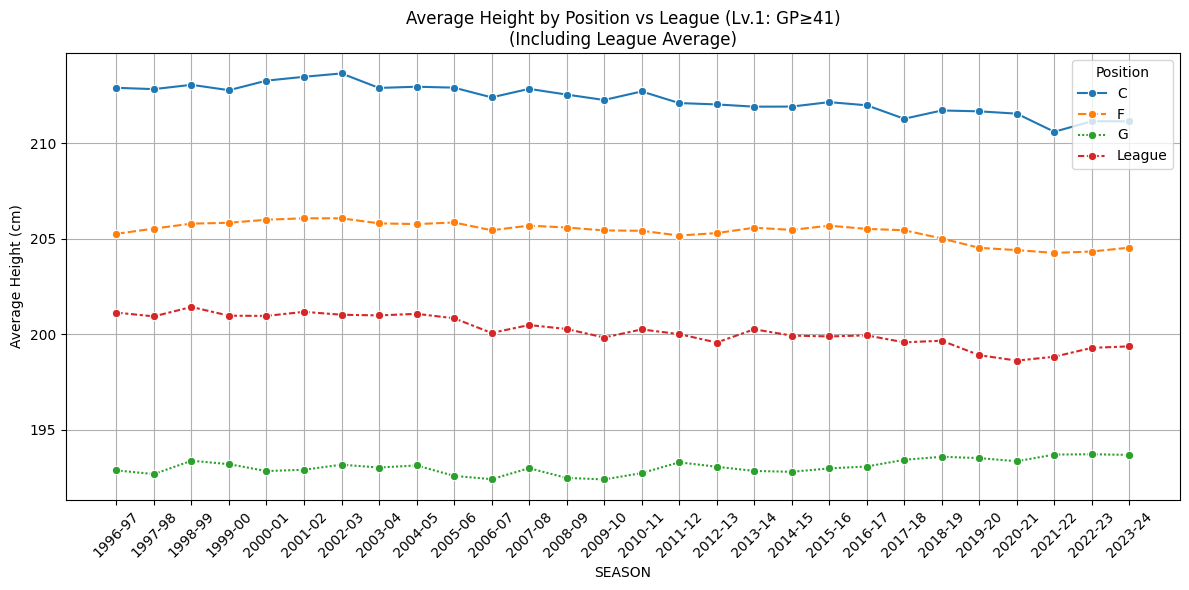

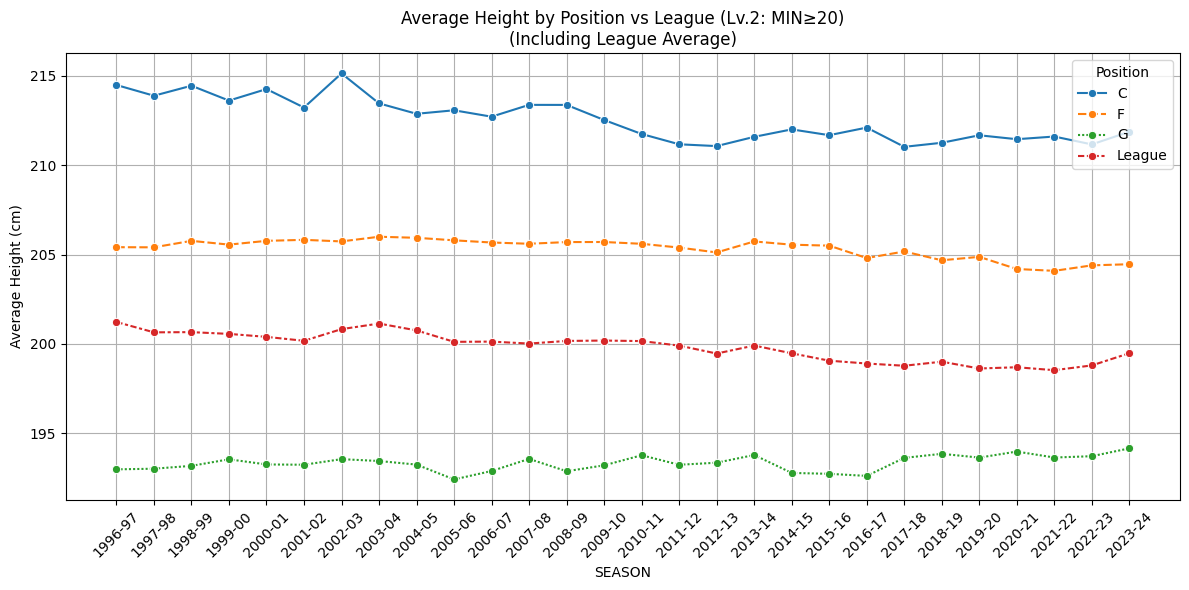

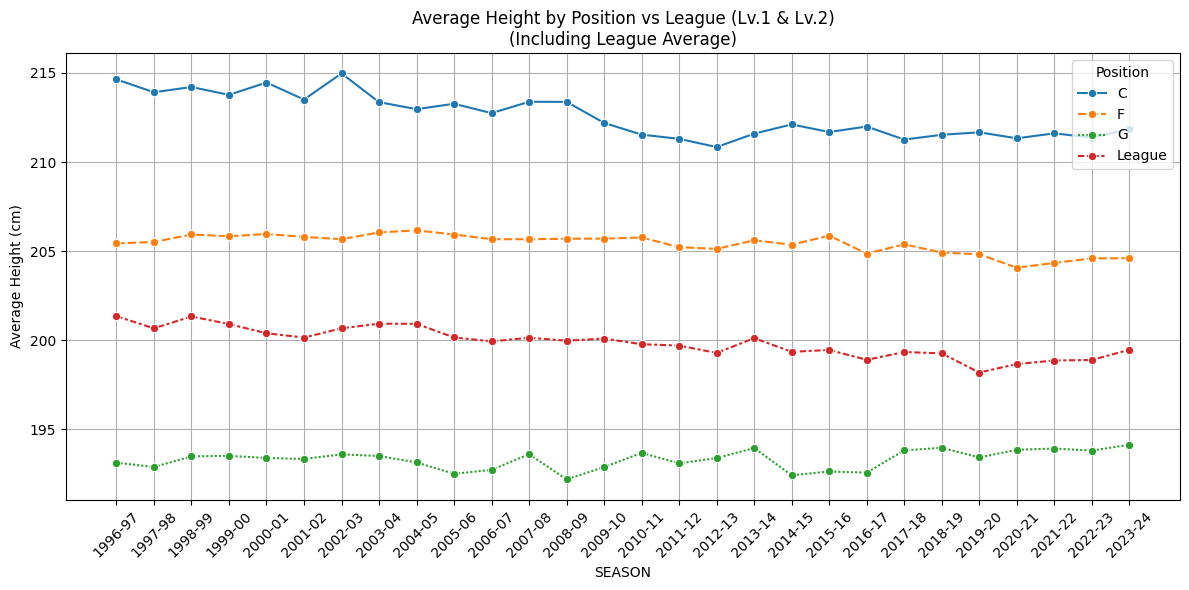

In [15]:
# lv1, lv2, lv1_lv2に対して実行
# Lv.1: GP >= 41
df_lv1_with_league = compute_with_league_avg(df, 'Lv1')
plot_with_league_avg(df_lv1_with_league, "Average Height by Position vs League (Lv.1: GP≥41)")

# Lv.2: MIN >= 20
df_lv2_with_league = compute_with_league_avg(df, 'Lv2')
plot_with_league_avg(df_lv2_with_league, "Average Height by Position vs League (Lv.2: MIN≥20)")

# Lv.1 & Lv.2: GP >= 41 & MIN >= 20
df_both_with_league = compute_with_league_avg(df, 'Lv1_and_Lv2')
plot_with_league_avg(df_both_with_league, "Average Height by Position vs League (Lv.1 & Lv.2)")